# Swiggy Data Science Assessment - LinkedIn, MTV Get a Job

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Import Dataset and Quick Inspection

In [2]:
dataset_path = './data/SampleAssessment.csv'
df = pd.read_csv(dataset_path)

In [3]:
df.head()

,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
0,1269647,6/29/15 10:57,12/10/15 2:18,212,6.0,43.0,138808,4291,26853,1.6,51
1,167631,7/4/15 15:39,12/15/15 14:42,211,8.0,19.0,56404,1925,4177,2.2,42
2,301524,6/26/15 9:56,12/9/15 20:45,189,9.0,33.0,36020,1772,6404,2.5,57
3,1268254,7/1/15 1:51,12/14/15 1:43,184,6.0,37.0,32489,975,7110,3.1,55
4,357161,7/11/15 18:34,12/19/15 23:26,182,4.0,23.0,85150,1738,9958,2.4,36


In [4]:
df.tail()

,customer_id,First Time,Recent Time,# of Orders,# of Orders in last 7 days,# of Orders in last 4 weeks,Amount,Amount in last 7 days,Amount in last 4 weeks,Avg_DistanceFromResturant,Avg_DeliveryTime
9995,995495,12/5/15 5:41,12/5/15 10:58,1,NaN,1.0,69,0,69,1.3,23
9996,337003,7/17/15 12:30,7/20/15 17:43,1,NaN,NaN,305,0,0,2.9,49
9997,993928,11/11/15 20:27,11/14/15 21:05,1,NaN,NaN,85,0,0,2.2,53
9998,398583,7/6/15 4:25,7/10/15 20:19,1,NaN,NaN,630,0,0,-0.1,20
9999,462448,7/25/15 0:36,7/25/15 6:21,1,NaN,NaN,293,0,0,3.7,49


In [5]:
df.columns = ['customer_id', 'first_time', 'recent_time', 'no_of_orders', 'orders_7_days', 'orders_last_4_weeks', 'amount', 'amt_last_7_days', 'amt_in_last_4_weeks', 'avg_dist_rest', 'avg_del_time']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
customer_id            10000 non-null int64
first_time             10000 non-null object
recent_time            10000 non-null object
no_of_orders           10000 non-null int64
orders_7_days          1923 non-null float64
orders_last_4_weeks    4341 non-null float64
amount                 10000 non-null int64
amt_last_7_days        10000 non-null int64
amt_in_last_4_weeks    10000 non-null int64
avg_dist_rest          10000 non-null float64
avg_del_time           10000 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [7]:
df.describe().round(2)

,customer_id,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time
count,10000.00,10000.00,1923.00,4341.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,671402.32,7.01,1.73,3.20,2253.27,109.50,455.49,2.36,36.91
std,390187.96,13.12,1.37,3.94,5136.48,397.06,1237.87,0.97,13.18
min,28.00,1.00,1.00,1.00,1.00,0.00,0.00,-0.80,15.00
25%,336514.75,1.00,1.00,1.00,279.00,0.00,0.00,1.70,26.00
50%,668339.50,2.00,1.00,2.00,688.00,0.00,0.00,2.40,36.50
75%,1005002.00,7.00,2.00,4.00,2040.00,0.00,398.00,3.02,47.00
max,1355445.00,212.00,14.00,46.00,138808.00,10150.00,26853.00,5.90,83.00


In [8]:
df['first_time'] = pd.to_datetime(df['first_time'])
df['recent_time'] = pd.to_datetime(df['recent_time'])

In [9]:
df.head()

,customer_id,first_time,recent_time,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time
0,1269647,2015-06-29 10:57:00,2015-12-10 02:18:00,212,6.0,43.0,138808,4291,26853,1.6,51
1,167631,2015-07-04 15:39:00,2015-12-15 14:42:00,211,8.0,19.0,56404,1925,4177,2.2,42
2,301524,2015-06-26 09:56:00,2015-12-09 20:45:00,189,9.0,33.0,36020,1772,6404,2.5,57
3,1268254,2015-07-01 01:51:00,2015-12-14 01:43:00,184,6.0,37.0,32489,975,7110,3.1,55
4,357161,2015-07-11 18:34:00,2015-12-19 23:26:00,182,4.0,23.0,85150,1738,9958,2.4,36


## Number of missing values (orders in 7 days and last 4 weeks)

In [10]:
df.isna().sum()

customer_id               0
first_time                0
recent_time               0
no_of_orders              0
orders_7_days          8077
orders_last_4_weeks    5659
amount                    0
amt_last_7_days           0
amt_in_last_4_weeks       0
avg_dist_rest             0
avg_del_time              0
dtype: int64

## Verifying whether the amount is zero for no orders

In [11]:
(df['amt_last_7_days'] == 0).sum(axis=0)

8078

In [12]:
(df['amt_in_last_4_weeks'] == 0).sum(axis=0)

5660

## Description of the subset of dataset with negative restaurant distances

In [13]:
df[df['avg_dist_rest'] < 0].describe().round(2)

,customer_id,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time
count,44.00,44.00,9.00,13.00,44.00,44.00,44.00,44.00,44.00
mean,701712.09,2.05,2.00,3.15,555.11,73.75,213.34,-0.23,31.27
std,351993.57,2.39,1.22,3.56,521.28,186.18,503.98,0.19,11.01
min,9736.00,1.00,1.00,1.00,2.00,0.00,0.00,-0.80,16.00
25%,410000.25,1.00,1.00,1.00,224.25,0.00,0.00,-0.30,21.00
50%,709034.50,1.00,2.00,1.00,436.00,0.00,0.00,-0.10,30.00
75%,1006586.50,2.00,2.00,4.00,706.50,0.00,192.25,-0.10,41.00
max,1314153.00,13.00,4.00,12.00,2355.00,814.00,2355.00,-0.10,52.00


## Description of the original dataset with negative restaurant distances

In [14]:
df.describe().round(2)

,customer_id,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time
count,10000.00,10000.00,1923.00,4341.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,671402.32,7.01,1.73,3.20,2253.27,109.50,455.49,2.36,36.91
std,390187.96,13.12,1.37,3.94,5136.48,397.06,1237.87,0.97,13.18
min,28.00,1.00,1.00,1.00,1.00,0.00,0.00,-0.80,15.00
25%,336514.75,1.00,1.00,1.00,279.00,0.00,0.00,1.70,26.00
50%,668339.50,2.00,1.00,2.00,688.00,0.00,0.00,2.40,36.50
75%,1005002.00,7.00,2.00,4.00,2040.00,0.00,398.00,3.02,47.00
max,1355445.00,212.00,14.00,46.00,138808.00,10150.00,26853.00,5.90,83.00


## Description of the dataset without negative restaurant distances

In [15]:
df[df['avg_dist_rest'] > 0].describe().round(2)

,customer_id,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time
count,9934.00,9934.00,1911.00,4323.00,9934.00,9934.00,9934.00,9934.00,9934.00
mean,671152.80,7.04,1.73,3.20,2264.58,109.82,457.25,2.37,36.94
std,390432.93,13.15,1.37,3.94,5151.28,398.13,1241.06,0.96,13.18
min,28.00,1.00,1.00,1.00,1.00,0.00,0.00,0.10,15.00
25%,335730.75,1.00,1.00,1.00,280.00,0.00,0.00,1.70,26.00
50%,667378.00,2.00,1.00,2.00,691.00,0.00,0.00,2.40,37.00
75%,1004865.75,7.00,2.00,4.00,2060.75,0.00,401.75,3.10,47.00
max,1355445.00,212.00,14.00,46.00,138808.00,10150.00,26853.00,5.90,83.00


* The mean and standard deviation are not much affected by the removal of negative disatances
* The above dataset will be use for further evaluations
* The rows with negative values are thereby discarded

In [16]:
df = df[df['avg_dist_rest'] > 0]
df.describe().round(2)

,customer_id,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time
count,9934.00,9934.00,1911.00,4323.00,9934.00,9934.00,9934.00,9934.00,9934.00
mean,671152.80,7.04,1.73,3.20,2264.58,109.82,457.25,2.37,36.94
std,390432.93,13.15,1.37,3.94,5151.28,398.13,1241.06,0.96,13.18
min,28.00,1.00,1.00,1.00,1.00,0.00,0.00,0.10,15.00
25%,335730.75,1.00,1.00,1.00,280.00,0.00,0.00,1.70,26.00
50%,667378.00,2.00,1.00,2.00,691.00,0.00,0.00,2.40,37.00
75%,1004865.75,7.00,2.00,4.00,2060.75,0.00,401.75,3.10,47.00
max,1355445.00,212.00,14.00,46.00,138808.00,10150.00,26853.00,5.90,83.00


## Correlation

In [17]:
df.corr()

,customer_id,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time
customer_id,1.000000,-0.012781,-0.047381,-0.040049,-0.000461,0.039074,0.059003,-0.026025,-0.029990
no_of_orders,-0.012781,1.000000,0.540287,0.753253,0.763145,0.375196,0.534801,-0.026490,0.003167
orders_7_days,-0.047381,0.540287,1.000000,0.727008,0.411076,0.519193,0.505799,-0.016251,-0.004929
orders_last_4_weeks,-0.040049,0.753253,0.727008,1.000000,0.579266,0.459385,0.681916,-0.031855,0.017876
amount,-0.000461,0.763145,0.411076,0.579266,1.000000,0.501629,0.706240,-0.020224,0.001974
amt_last_7_days,0.039074,0.375196,0.519193,0.459385,0.501629,1.000000,0.710047,0.002372,-0.001744
amt_in_last_4_weeks,0.059003,0.534801,0.505799,0.681916,0.706240,0.710047,1.000000,-0.008472,-0.016539
avg_dist_rest,-0.026025,-0.026490,-0.016251,-0.031855,-0.020224,0.002372,-0.008472,1.000000,0.086058
avg_del_time,-0.029990,0.003167,-0.004929,0.017876,0.001974,-0.001744,-0.016539,0.086058,1.000000


* It appears that there are no other important correlations other than order vs amount

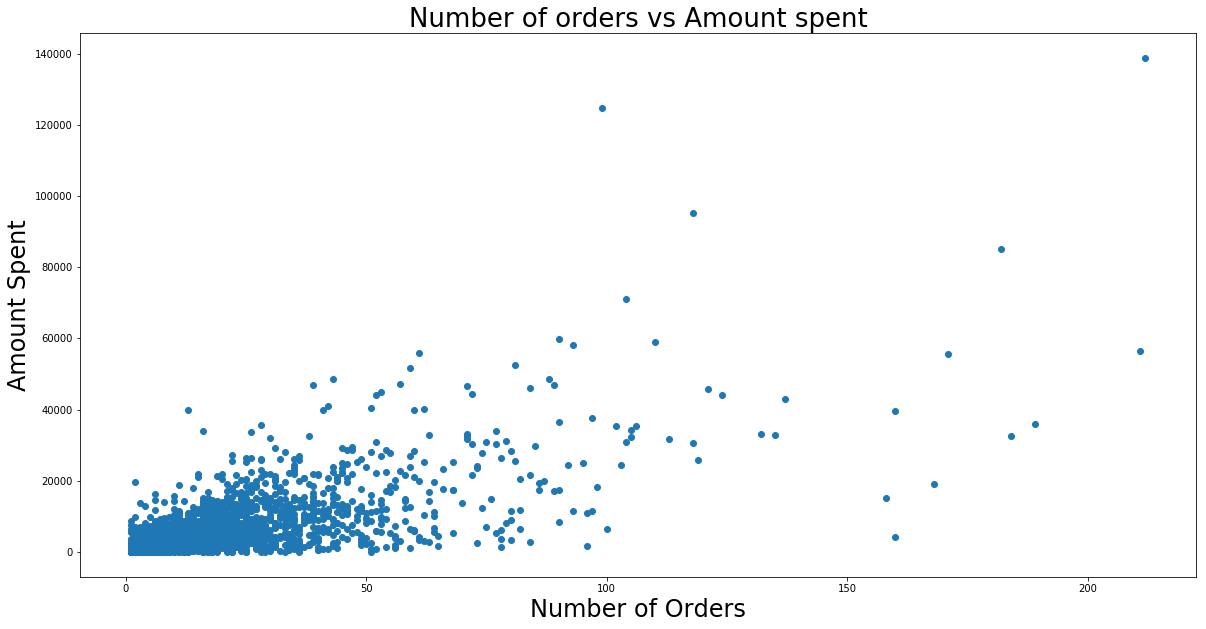

In [18]:
plt.figure(figsize=(20,10))
plt.title('Number of orders vs Amount spent', fontsize=26)
plt.xlabel('Number of Orders', fontsize=24)
plt.ylabel('Amount Spent', fontsize=24)
plt.scatter(df['no_of_orders'], df['amount'])
plt.show()

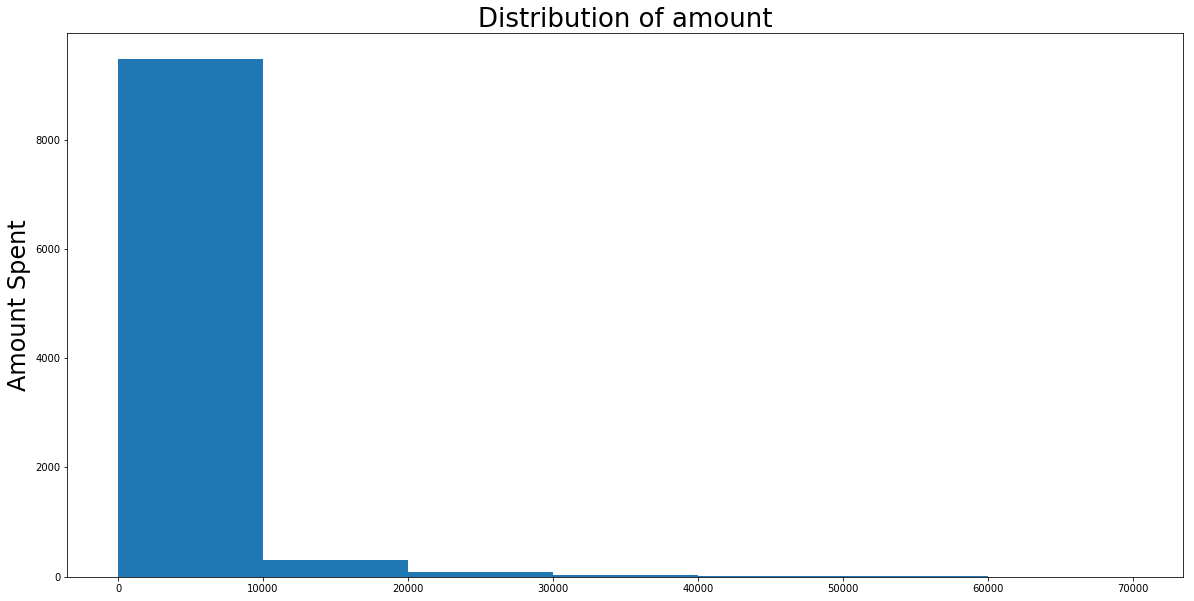

In [19]:
plt.figure(figsize=(20,10))
plt.title('Distribution of amount', fontsize=26)
plt.ylabel('Amount Spent', fontsize=24)
plt.hist(df['amount'], bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000])
plt.show()

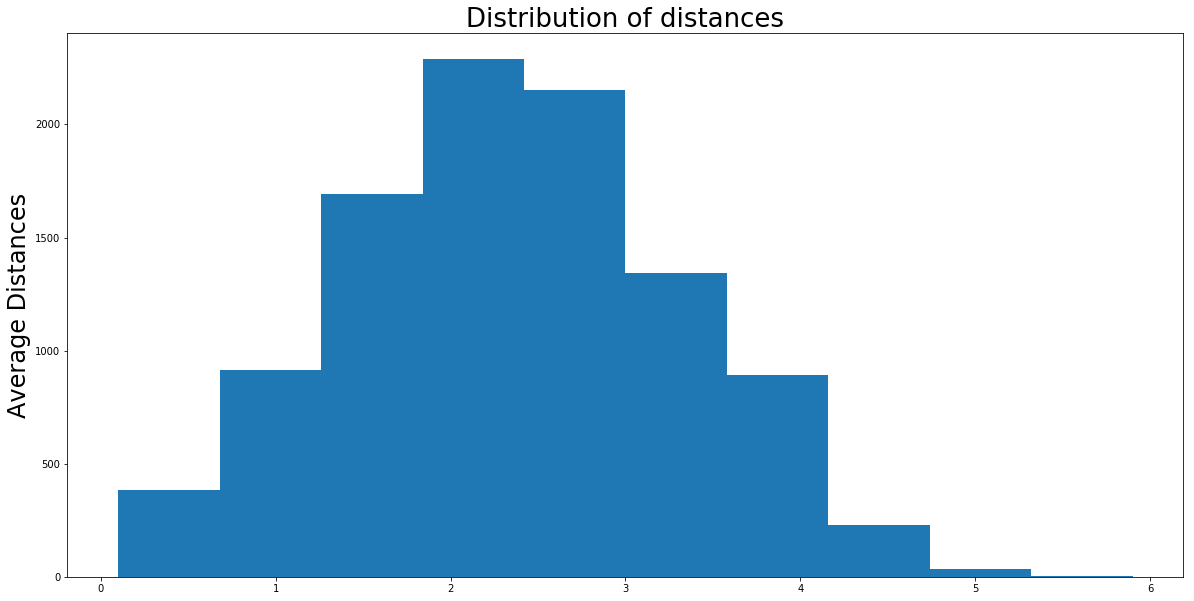

In [20]:
plt.figure(figsize=(20,10))
plt.title('Distribution of distances', fontsize=26)
plt.ylabel('Average Distances', fontsize=24)
plt.hist(df['avg_dist_rest'])
plt.show()

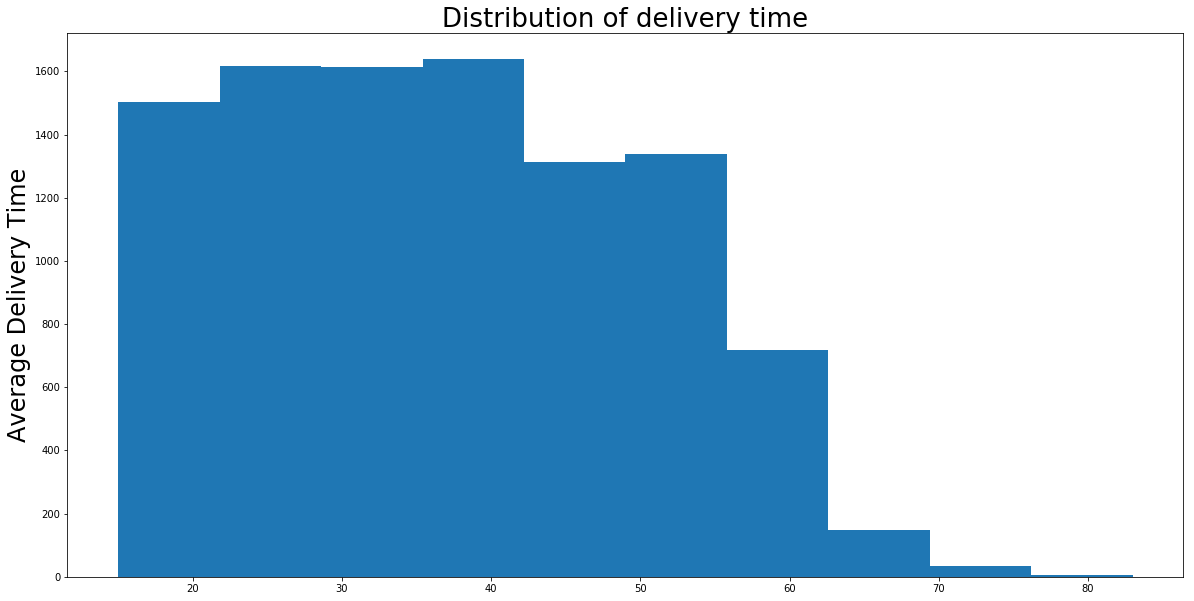

In [21]:
plt.figure(figsize=(20,10))
plt.title('Distribution of delivery time', fontsize=26)
plt.ylabel('Average Delivery Time', fontsize=24)
plt.hist(df['avg_del_time'])
plt.show()

In [22]:
df.head()

,customer_id,first_time,recent_time,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time
0,1269647,2015-06-29 10:57:00,2015-12-10 02:18:00,212,6.0,43.0,138808,4291,26853,1.6,51
1,167631,2015-07-04 15:39:00,2015-12-15 14:42:00,211,8.0,19.0,56404,1925,4177,2.2,42
2,301524,2015-06-26 09:56:00,2015-12-09 20:45:00,189,9.0,33.0,36020,1772,6404,2.5,57
3,1268254,2015-07-01 01:51:00,2015-12-14 01:43:00,184,6.0,37.0,32489,975,7110,3.1,55
4,357161,2015-07-11 18:34:00,2015-12-19 23:26:00,182,4.0,23.0,85150,1738,9958,2.4,36


# Calculating customer Recency

In [23]:
latest_recent_time = df['recent_time'].max()

In [24]:
df['recency'] = df['recent_time'].apply(lambda x: (latest_recent_time - x).days)
df['delivery_score'] = df['avg_del_time'] / df['avg_dist_rest']

In [25]:
df.head()

,customer_id,first_time,recent_time,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time,recency,delivery_score
0,1269647,2015-06-29 10:57:00,2015-12-10 02:18:00,212,6.0,43.0,138808,4291,26853,1.6,51,34,31.875000
1,167631,2015-07-04 15:39:00,2015-12-15 14:42:00,211,8.0,19.0,56404,1925,4177,2.2,42,28,19.090909
2,301524,2015-06-26 09:56:00,2015-12-09 20:45:00,189,9.0,33.0,36020,1772,6404,2.5,57,34,22.800000
3,1268254,2015-07-01 01:51:00,2015-12-14 01:43:00,184,6.0,37.0,32489,975,7110,3.1,55,30,17.741935
4,357161,2015-07-11 18:34:00,2015-12-19 23:26:00,182,4.0,23.0,85150,1738,9958,2.4,36,24,15.000000


In [26]:
quantiles = df.quantile(q=[0.25,0.5,0.75])
quantiles.to_dict()

{'customer_id': {0.25: 335730.75, 0.5: 667378.0, 0.75: 1004865.75},
 'no_of_orders': {0.25: 1.0, 0.5: 2.0, 0.75: 7.0},
 'orders_7_days': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'orders_last_4_weeks': {0.25: 1.0, 0.5: 2.0, 0.75: 4.0},
 'amount': {0.25: 280.0, 0.5: 691.0, 0.75: 2060.75},
 'amt_last_7_days': {0.25: 0.0, 0.5: 0.0, 0.75: 0.0},
 'amt_in_last_4_weeks': {0.25: 0.0, 0.5: 0.0, 0.75: 401.75},
 'avg_dist_rest': {0.25: 1.7, 0.5: 2.4, 0.75: 3.1},
 'avg_del_time': {0.25: 26.0, 0.5: 37.0, 0.75: 47.0},
 'recency': {0.25: 39.0, 0.5: 65.0, 0.75: 111.0},
 'delivery_score': {0.25: 10.74074074074074,
  0.5: 15.65217391304348,
  0.75: 22.5}}

In [27]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [28]:
rfm_segmentation_7_days = df
rfm_segmentation_7_days['r_quartile_7_days'] = rfm_segmentation_7_days['recency'].apply(RScore, args=('recency',quantiles,))
rfm_segmentation_7_days['f_quartile_7_days'] = rfm_segmentation_7_days['orders_7_days'].apply(FMScore, args=('orders_7_days',quantiles,))
rfm_segmentation_7_days['m_quartile_7_days'] = rfm_segmentation_7_days['amt_last_7_days'].apply(FMScore, args=('amt_last_7_days',quantiles,))
rfm_segmentation_7_days.head()

,customer_id,first_time,recent_time,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time,recency,delivery_score,r_quartile_7_days,f_quartile_7_days,m_quartile_7_days
0,1269647,2015-06-29 10:57:00,2015-12-10 02:18:00,212,6.0,43.0,138808,4291,26853,1.6,51,34,31.875000,4,4,4
1,167631,2015-07-04 15:39:00,2015-12-15 14:42:00,211,8.0,19.0,56404,1925,4177,2.2,42,28,19.090909,4,4,4
2,301524,2015-06-26 09:56:00,2015-12-09 20:45:00,189,9.0,33.0,36020,1772,6404,2.5,57,34,22.800000,4,4,4
3,1268254,2015-07-01 01:51:00,2015-12-14 01:43:00,184,6.0,37.0,32489,975,7110,3.1,55,30,17.741935,4,4,4
4,357161,2015-07-11 18:34:00,2015-12-19 23:26:00,182,4.0,23.0,85150,1738,9958,2.4,36,24,15.000000,4,4,4


In [29]:
rfm_segmentation_4_weeks = df
rfm_segmentation_4_weeks['r_quartile_4_weeks'] = rfm_segmentation_4_weeks['recency'].apply(RScore, args=('recency',quantiles,))
rfm_segmentation_4_weeks['f_quartile_4_weeks'] = rfm_segmentation_4_weeks['orders_last_4_weeks'].apply(FMScore, args=('orders_last_4_weeks',quantiles,))
rfm_segmentation_4_weeks['m_quartile_4_weeks'] = rfm_segmentation_4_weeks['amt_in_last_4_weeks'].apply(FMScore, args=('amt_in_last_4_weeks',quantiles,))
rfm_segmentation_4_weeks.head()

,customer_id,first_time,recent_time,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time,recency,delivery_score,r_quartile_7_days,f_quartile_7_days,m_quartile_7_days,r_quartile_4_weeks,f_quartile_4_weeks,m_quartile_4_weeks
0,1269647,2015-06-29 10:57:00,2015-12-10 02:18:00,212,6.0,43.0,138808,4291,26853,1.6,51,34,31.875000,4,4,4,4,4,4
1,167631,2015-07-04 15:39:00,2015-12-15 14:42:00,211,8.0,19.0,56404,1925,4177,2.2,42,28,19.090909,4,4,4,4,4,4
2,301524,2015-06-26 09:56:00,2015-12-09 20:45:00,189,9.0,33.0,36020,1772,6404,2.5,57,34,22.800000,4,4,4,4,4,4
3,1268254,2015-07-01 01:51:00,2015-12-14 01:43:00,184,6.0,37.0,32489,975,7110,3.1,55,30,17.741935,4,4,4,4,4,4
4,357161,2015-07-11 18:34:00,2015-12-19 23:26:00,182,4.0,23.0,85150,1738,9958,2.4,36,24,15.000000,4,4,4,4,4,4


In [30]:
rfm_segmentation_7_days['RFMScore_7_days'] = rfm_segmentation_7_days.r_quartile_7_days \
                            * rfm_segmentation_7_days.f_quartile_7_days \
                            * rfm_segmentation_7_days.m_quartile_7_days \
                            * rfm_segmentation_7_days.delivery_score
rfm_segmentation_7_days.head()

,customer_id,first_time,recent_time,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time,recency,delivery_score,r_quartile_7_days,f_quartile_7_days,m_quartile_7_days,r_quartile_4_weeks,f_quartile_4_weeks,m_quartile_4_weeks,RFMScore_7_days
0,1269647,2015-06-29 10:57:00,2015-12-10 02:18:00,212,6.0,43.0,138808,4291,26853,1.6,51,34,31.875000,4,4,4,4,4,4,2040.000000
1,167631,2015-07-04 15:39:00,2015-12-15 14:42:00,211,8.0,19.0,56404,1925,4177,2.2,42,28,19.090909,4,4,4,4,4,4,1221.818182
2,301524,2015-06-26 09:56:00,2015-12-09 20:45:00,189,9.0,33.0,36020,1772,6404,2.5,57,34,22.800000,4,4,4,4,4,4,1459.200000
3,1268254,2015-07-01 01:51:00,2015-12-14 01:43:00,184,6.0,37.0,32489,975,7110,3.1,55,30,17.741935,4,4,4,4,4,4,1135.483871
4,357161,2015-07-11 18:34:00,2015-12-19 23:26:00,182,4.0,23.0,85150,1738,9958,2.4,36,24,15.000000,4,4,4,4,4,4,960.000000


In [31]:
rfm_segmentation_7_days.describe()

,customer_id,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,avg_del_time,recency,delivery_score,r_quartile_7_days,f_quartile_7_days,m_quartile_7_days,r_quartile_4_weeks,f_quartile_4_weeks,m_quartile_4_weeks,RFMScore_7_days
count,9.934000e+03,9934.000000,1911.000000,4323.000000,9934.00000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000
mean,6.711528e+05,7.039964,1.734694,3.199399,2264.57570,109.824945,457.245218,2.372871,36.937487,78.521240,21.514811,2.506543,3.602879,1.576807,2.506543,3.187034,2.120193,256.353922
std,3.904329e+05,13.154371,1.371454,3.943907,5151.28199,398.132535,1241.058089,0.956260,13.180592,48.488268,30.081530,1.116630,0.976743,1.182309,1.116630,1.208318,1.317528,395.715899
min,2.800000e+01,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.100000,15.000000,0.000000,3.125000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.117647
25%,3.357308e+05,1.000000,1.000000,1.000000,280.00000,0.000000,0.000000,1.700000,26.000000,39.000000,10.740741,2.000000,4.000000,1.000000,2.000000,2.000000,1.000000,83.478261
50%,6.673780e+05,2.000000,1.000000,2.000000,691.00000,0.000000,0.000000,2.400000,37.000000,65.000000,15.652174,3.000000,4.000000,1.000000,3.000000,4.000000,1.000000,152.727273
75%,1.004866e+06,7.000000,2.000000,4.000000,2060.75000,0.000000,401.750000,3.100000,47.000000,111.000000,22.500000,4.000000,4.000000,1.000000,4.000000,4.000000,3.750000,271.562998
max,1.355445e+06,212.000000,14.000000,46.000000,138808.00000,10150.000000,26853.000000,5.900000,83.000000,218.000000,540.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,11093.333333


In [32]:
rfm_segmentation_4_weeks['RFMScore_4_weeks'] = rfm_segmentation_4_weeks.r_quartile_4_weeks \
                            * rfm_segmentation_4_weeks.f_quartile_4_weeks \
                            * rfm_segmentation_4_weeks.m_quartile_4_weeks \
                            * rfm_segmentation_4_weeks.delivery_score
rfm_segmentation_4_weeks.head()

,customer_id,first_time,recent_time,no_of_orders,orders_7_days,orders_last_4_weeks,amount,amt_last_7_days,amt_in_last_4_weeks,avg_dist_rest,...,recency,delivery_score,r_quartile_7_days,f_quartile_7_days,m_quartile_7_days,r_quartile_4_weeks,f_quartile_4_weeks,m_quartile_4_weeks,RFMScore_7_days,RFMScore_4_weeks
0,1269647,2015-06-29 10:57:00,2015-12-10 02:18:00,212,6.0,43.0,138808,4291,26853,1.6,...,34,31.875000,4,4,4,4,4,4,2040.000000,2040.000000
1,167631,2015-07-04 15:39:00,2015-12-15 14:42:00,211,8.0,19.0,56404,1925,4177,2.2,...,28,19.090909,4,4,4,4,4,4,1221.818182,1221.818182
2,301524,2015-06-26 09:56:00,2015-12-09 20:45:00,189,9.0,33.0,36020,1772,6404,2.5,...,34,22.800000,4,4,4,4,4,4,1459.200000,1459.200000
3,1268254,2015-07-01 01:51:00,2015-12-14 01:43:00,184,6.0,37.0,32489,975,7110,3.1,...,30,17.741935,4,4,4,4,4,4,1135.483871,1135.483871
4,357161,2015-07-11 18:34:00,2015-12-19 23:26:00,182,4.0,23.0,85150,1738,9958,2.4,...,24,15.000000,4,4,4,4,4,4,960.000000,960.000000


## Customer Segments (count) in the last 7 days

In [33]:
print("Best Customers: ", len(rfm_segmentation_7_days[rfm_segmentation_7_days['RFMScore_7_days']==64]))
print("Best Spenders: ", len(rfm_segmentation_7_days[rfm_segmentation_7_days['m_quartile_7_days']==4]))
print('Not so loyal: ', len(rfm_segmentation_7_days[rfm_segmentation_7_days['RFMScore_7_days']==32]))
print('Not loyal (lost): ', len(rfm_segmentation_7_days[rfm_segmentation_7_days['RFMScore_7_days']==16]))
print('Least spending (lost): ', len(rfm_segmentation_7_days[rfm_segmentation_7_days['RFMScore_7_days']==1]))

Best Customers:  18
Best Spenders:  1910
Not so loyal:  10
Not loyal (lost):  0
Least spending (lost):  0


## Customer Segments (count) in the last 4 weeks

In [34]:
print("Best Customers: ", len(rfm_segmentation_4_weeks[rfm_segmentation_4_weeks['RFMScore_4_weeks']==64]))
print("Best Spenders: ", len(rfm_segmentation_4_weeks[rfm_segmentation_4_weeks['m_quartile_4_weeks']==4]))
print('Not so loyal: ', len(rfm_segmentation_4_weeks[rfm_segmentation_4_weeks['RFMScore_4_weeks']==32]))
print('Not loyal (lost): ', len(rfm_segmentation_4_weeks[rfm_segmentation_4_weeks['RFMScore_4_weeks']==16]))
print('Least spending (lost): ', len(rfm_segmentation_4_weeks[rfm_segmentation_4_weeks['RFMScore_4_weeks']==1]))

Best Customers:  18
Best Spenders:  2484
Not so loyal:  10
Not loyal (lost):  0
Least spending (lost):  0


## Moving on to K Means Clustering

In [35]:
rfm_segmentation_7_days_values = rfm_segmentation_7_days[['amount', 'RFMScore_7_days']].values
rfm_segmentation_4_weeks_values = rfm_segmentation_4_weeks[['amount', 'RFMScore_4_weeks']].values

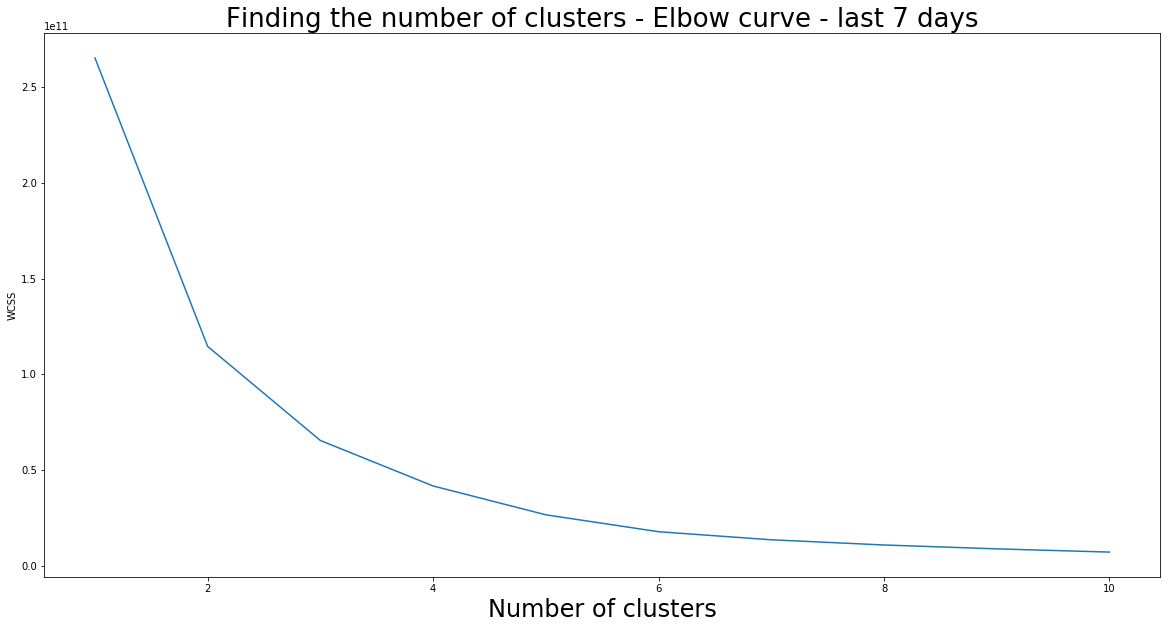

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_segmentation_7_days_values)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(20,10))
plt.plot(range(1, 11), wcss)
plt.title('Finding the number of clusters - Elbow curve - last 7 days', fontsize=26)
plt.xlabel('Number of clusters', fontsize=24)
plt.ylabel('WCSS')
plt.show()

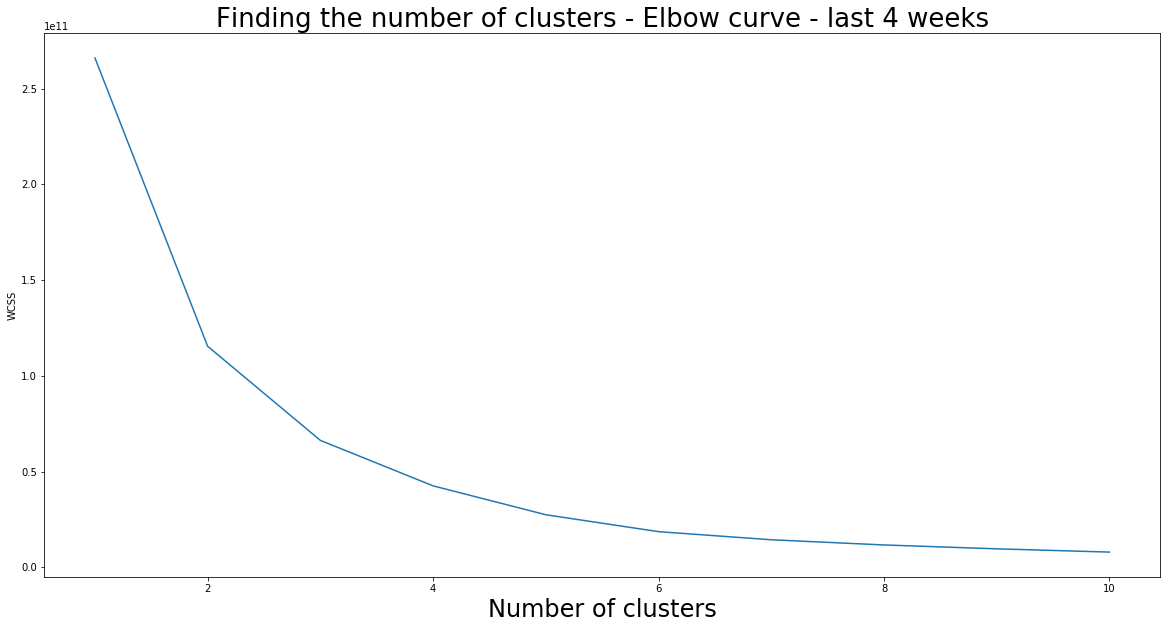

In [37]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_segmentation_4_weeks_values)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(20,10))
plt.plot(range(1, 11), wcss)
plt.title('Finding the number of clusters - Elbow curve - last 4 weeks', fontsize=26)
plt.xlabel('Number of clusters', fontsize=24)
plt.ylabel('WCSS')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(rfm_segmentation_7_days_values)

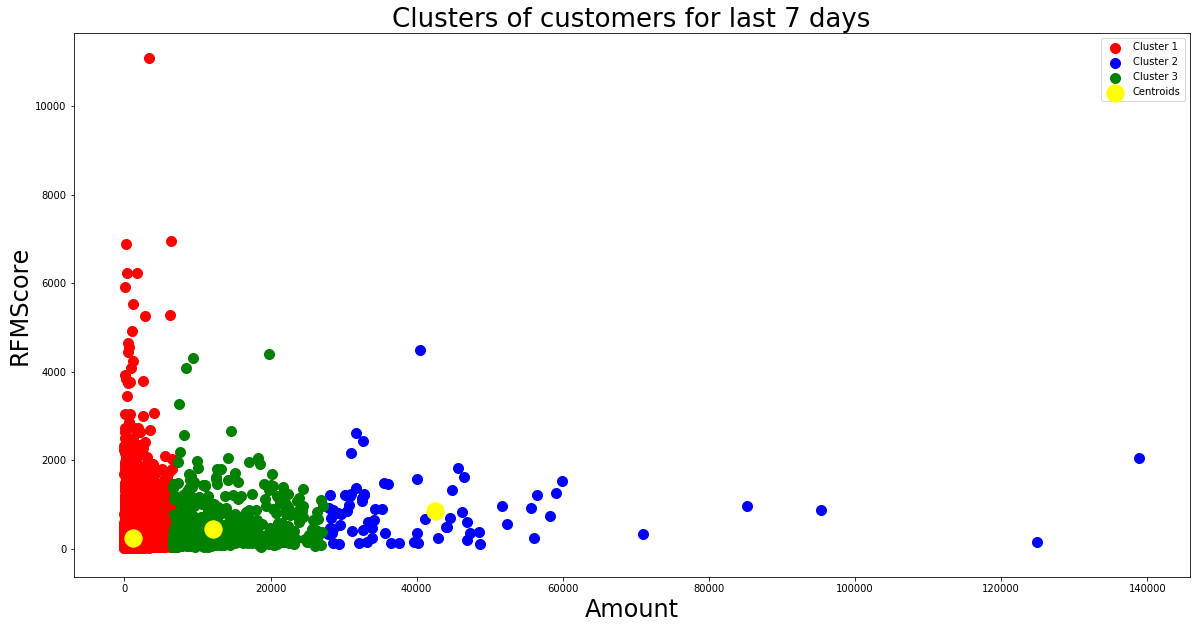

In [39]:
# Visulizing the clusters
plt.figure(figsize=(20,10))
plt.scatter(rfm_segmentation_7_days_values[y_kmeans==0, 0], rfm_segmentation_7_days_values[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(rfm_segmentation_7_days_values[y_kmeans==1, 0], rfm_segmentation_7_days_values[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(rfm_segmentation_7_days_values[y_kmeans==2, 0], rfm_segmentation_7_days_values[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers for last 7 days', fontsize=26)
plt.xlabel('Amount', fontsize=24)
plt.ylabel('RFMScore', fontsize=24)
plt.legend()
plt.show()

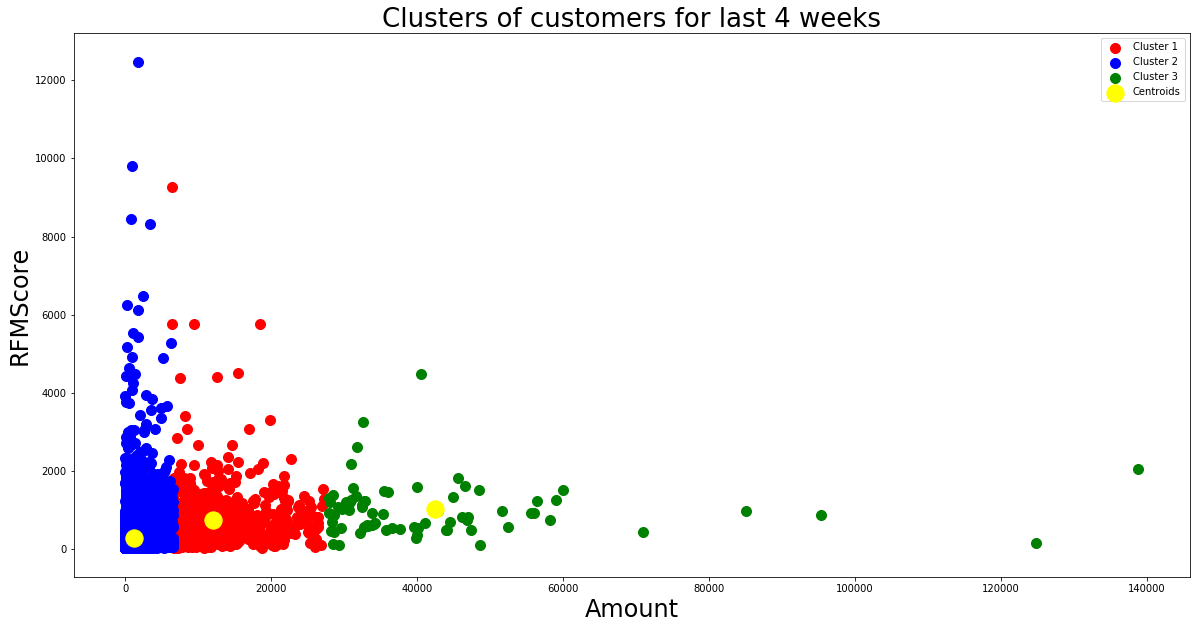

In [40]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(rfm_segmentation_4_weeks_values)

# Visulizing the clusters
plt.figure(figsize=(20,10))
plt.scatter(rfm_segmentation_4_weeks_values[y_kmeans==0, 0], rfm_segmentation_4_weeks_values[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(rfm_segmentation_4_weeks_values[y_kmeans==1, 0], rfm_segmentation_4_weeks_values[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(rfm_segmentation_4_weeks_values[y_kmeans==2, 0], rfm_segmentation_4_weeks_values[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers for last 4 weeks', fontsize=26)
plt.xlabel('Amount', fontsize=24)
plt.ylabel('RFMScore', fontsize=24)
plt.legend()
plt.show()